# 8.1. Modelling: overview

Module M-227-04: Programming for Data Analytics

Instructor: prof. Dmitry Pavlyuk

## Overview

This short presentation is focused on techical aspects of modeliing in Python only, including examples of
- Regression
- Classification
- Clustering

The essence of the presented algorithms is not revealed - it will be covered in the following courses:
- __Data Mining__ 
- __Machine Learning and Predictive Analytics__

## Sklearn library

Scikit-learn (sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms

In [1]:
!pip install scikit-learn

## Data loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.dpi':100, 'figure.figsize':(6,4)})
sns.set(style="darkgrid", palette="Accent")
bikes = pd.read_csv("../week5/data/bikes.csv")
bikes['season'] = bikes['season'].astype("category")
bikes["datetime"] = pd.to_datetime(bikes["datetime"], format='%d/%m/%Y %H:%M')
bikes['hour'] = bikes['datetime'].dt.hour
bikes = bikes.drop(["datetime","casual","registered","weather"], axis=1)
bikes.head()

,season,holiday,workingday,temp,atemp,humidity,windspeed,count,hour
0,spring,0,0,9.84,14.395,81,0.0,16,0
1,spring,0,0,9.02,13.635,80,0.0,40,1
2,spring,0,0,9.02,13.635,80,0.0,32,2
3,spring,0,0,9.84,14.395,75,0.0,13,3
4,spring,0,0,9.84,14.395,75,0.0,1,4


## Data: correlation

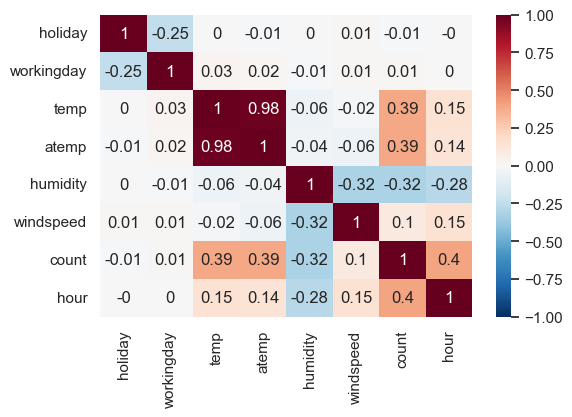

In [3]:
sns.heatmap(np.round(bikes.corr(),2), annot=True, cmap="RdBu_r",vmin=-1, vmax=1);

## Regression

## Regression

A __regression model__ estimates the relationships between a dependent variable and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features').

Regression algorithms usually predict a continuous dependent variables, while prediction of categorical variables is referred as classification.

## Data preparation: one-hot encoding

In [4]:
bikes = pd.get_dummies(bikes, drop_first=True)

In [5]:
bikes.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,season_spring,season_summer,season_winter
0,0,0,9.84,14.395,81,0.0,16,0,1,0,0
1,0,0,9.02,13.635,80,0.0,40,1,1,0,0
2,0,0,9.02,13.635,80,0.0,32,2,1,0,0
3,0,0,9.84,14.395,75,0.0,13,3,1,0,0
4,0,0,9.84,14.395,75,0.0,1,4,1,0,0


## Data preparation: train/test splitting 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bikes.drop("count", axis=1), bikes["count"], test_size=0.2)
print("Training explanatory variables:", x_train.shape)
print("Testing explanatory variables:", x_test.shape)

Training explanatory variables: (8708, 10)
Testing explanatory variables: (2178, 10)


In [7]:
x_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,season_spring,season_summer,season_winter
9811,0,0,12.3,15.150,65,11.0014,4,0,0,1
7022,0,1,16.4,20.455,37,32.9975,22,0,1,0
3709,1,0,28.7,33.335,74,11.0014,11,0,0,0
776,0,1,12.3,15.150,22,8.9981,18,1,0,0
8043,0,1,28.7,31.820,45,11.0014,12,0,1,0


In [8]:
y_train.head()

9811     11
7022    127
3709    308
776     212
8043    403
Name: count, dtype: int64

## Linear Regression: statmodels

In [9]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(x_train))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     458.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:56:37   Log-Likelihood:                -55723.
No. Observations:                8708   AIC:                         1.115e+05
Df Residuals:                    8697   BIC:                         1.115e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.6005     13.426      1.832      0.067      -1.718      50.919
holiday          -6.2609      9.503     -0.659      0.510     -24.889      12.367
workingday       -3.6419      3.478     -1.047      0.295     -10.460       3.176
temp              6.2425      1.244      5.019      0.000       3.804       8.681
atemp             2.6059      1.089      2.393      0.017       0.471       4.741
humidity         -2.1541      0.091    -23.593      0.000      -2.333      -1.975
windspeed         0.3309      0.208      1.593      0.111      -0.076       0.738
hour              7.2155      0.241     29.998      0.000       6.744       7.687
season_spring     7.8184      7.329      1.067      0.286      -6.549      22.186
season_summer    25.1700      4.978      5.056      0.000      15.411      34.929
season_winter    74.1261      6.116     12.120      0.000      62.137      86.115
==============================================================================
Omnibus:                     2164.869   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5094.077
Skew:                           1.392   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         725.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression: sklearn

### Estimation

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train);

### Accuracy

In [11]:
print("RMSE (training set) =",np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("RMSE (testing set) =",np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

RMSE (training set) = 145.4876052372171
RMSE (testing set) = 151.7055156864367


## Random Forest Regression

### Estimation

In [12]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_train, y_train);

### Accuracy

In [13]:
print("RMSE (training set) =",np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("RMSE (testing set) =",np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

RMSE (training set) = 27.105001579433956
RMSE (testing set) = 76.11084826566358


## Random Forest Regression: feature importance

In [14]:
feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False)

,Importance
hour,0.598754
temp,0.110416
humidity,0.080579
workingday,0.071273
atemp,0.054503
windspeed,0.041218
season_spring,0.021391
season_winter,0.012254
season_summer,0.006448
holiday,0.003164


## Gradient Boosting Regression

### Estimation

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

### Accuracy

In [16]:
print("RMSE (training set) =",np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("RMSE (testing set) =",np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

RMSE (training set) = 82.74455669790495
RMSE (testing set) = 88.57735664743353


## Artificial Neural Network (Multilayer perceptron)

### Estimation

In [17]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(activation='relu', solver='adam',
                     hidden_layer_sizes=(100,100),
                     max_iter=1000)
model.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

### Accuracy

In [18]:
print("RMSE (training set) =",np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("RMSE (testing set) =",np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

RMSE (training set) = 80.58197573311836
RMSE (testing set) = 91.37904373463188


## Classification

## Classification

Classification is a process of finding a function which helps in dividing the dataset into classes based on different parameters and their relationships with class labels.

### Data preparation: loading

In [19]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data preparation: train/test splitting 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop("species",axis=1), iris["species"], test_size=0.20)
print("Training explanatory variables:", x_train.shape)
print("Testing explanatory variables:", x_test.shape)

Training explanatory variables: (120, 4)
Testing explanatory variables: (30, 4)


In [21]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
117,7.7,3.8,6.7,2.2
0,5.1,3.5,1.4,0.2
51,6.4,3.2,4.5,1.5
97,6.2,2.9,4.3,1.3
47,4.6,3.2,1.4,0.2


In [22]:
y_train.head()

117     virginica
0          setosa
51     versicolor
97     versicolor
47         setosa
Name: species, dtype: object

## Data preparation: scaling 

Scaling is a method used to normalize the range of independent variables of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [23]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

##  K-nearest neighbors Classifier

### Estimation

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train) 
y_predict = classifier.predict(x_test)

##  K-nearest neighbors Classifier

### Accuracy

In [25]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index=classifier.classes_, columns=classifier.classes_)

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,10,0
virginica,0,2,7


In [26]:
pd.DataFrame(classification_report(y_test, y_predict, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.833333,1.000000,0.933333,0.944444,0.944444
recall,1.0,1.000000,0.777778,0.933333,0.925926,0.933333
f1-score,1.0,0.909091,0.875000,0.933333,0.928030,0.932197
support,11.0,10.000000,9.000000,0.933333,30.000000,30.000000


##  Naive Bayes Classifier

### Estimation

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

### Accuracy

In [28]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index=classifier.classes_, columns=classifier.classes_)

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,10,0
virginica,0,1,8


In [29]:
pd.DataFrame(classification_report(y_test, y_predict, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.909091,1.000000,0.966667,0.969697,0.969697
recall,1.0,1.000000,0.888889,0.966667,0.962963,0.966667
f1-score,1.0,0.952381,0.941176,0.966667,0.964519,0.966480
support,11.0,10.000000,9.000000,0.966667,30.000000,30.000000


##  Random Forest Classifier

### Estimation

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

### Accuracy

In [31]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index=classifier.classes_, columns=classifier.classes_)

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,10,0
virginica,0,1,8


In [32]:
pd.DataFrame(classification_report(y_test, y_predict, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.909091,1.000000,0.966667,0.969697,0.969697
recall,1.0,1.000000,0.888889,0.966667,0.962963,0.966667
f1-score,1.0,0.952381,0.941176,0.966667,0.964519,0.966480
support,11.0,10.000000,9.000000,0.966667,30.000000,30.000000


##  Clustering

##  Clustering

Cluster analysis is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups.

### Data preparation: scaling 

In [33]:
from sklearn.preprocessing import StandardScaler
x, y = iris.drop("species",axis=1), iris["species"]
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

##  Clustering

###  Estimation

In [34]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300)
kmeans.fit(x_scaled)

KMeans(init='random', n_clusters=3)

### Results

In [35]:
print("Silhouette score =",silhouette_score(x_scaled, kmeans.labels_))
print("Cluster centres:")
pd.DataFrame(kmeans.cluster_centers_, columns = x.columns)

Silhouette score = 0.45994823920518646
Cluster centres:


,sepal_length,sepal_width,petal_length,petal_width
0,-0.050220,-0.883376,0.347738,0.281527
1,-1.014579,0.853263,-1.304987,-1.254893
2,1.135970,0.088422,0.996155,1.017526


##  Clustering

### Results

In [36]:
res = pd.DataFrame({"kmeans":kmeans.labels_, "real":y})
pd.crosstab(res["real"],res["kmeans"])

kmeans,0,1,2
real,,,
setosa,0,50,0
versicolor,39,0,11
virginica,14,0,36


## Dive into machine learning

## Traditional Vs. Deep machine learning

Scikit-learn (sklearn) is positioned as a general-purpose machine learning library, while recently the accent is shifted to deep learning

* Traditional machine learning - use feature engineering to refine and clean the data
* Deep learning - using representation learning, the machine learning model itself refines the data

## Popular deep learning libraries

* __PyTorch__ - an open source machine learning framework that accelerates the path from research prototyping to production deployment
    * Tensor computing (like NumPy) with strong acceleration via graphics processing units (GPU)
    * Deep neural networks built on a tape-based automatic differentiation system
* __TensorFlow__ - an open-source software library for machine learning and artificial intelligence.
    * Tensor computing (like NumPy) with strong acceleration via graphics processing units (GPU) and tensor processing unit (TPU)
    * Deep neural networks - automatic differentiation, distributed computations, etc.
* __Keras__ is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.

# Thank you